# Spot-The-Sugar

## Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from pathlib import Path
import gdown
import zipfile
import math
from tensorflow.keras.preprocessing import image

## Loading Data



In [ ]:
# Define file IDs and destinations
file_ids = [
    '1dfvjHygEQ8e4tIWjjSeolhcthSQhJAva', '1j_KJbNhMThYdSRebrpV35dLupiuPNMuR',
    '14F2FsUuEcPlQsNSdvcxPg0kweJV759a4', '1Gk9RFAwgzOuALKD3ZJxpyaZ9lcajGthZ',
    '1gko_Sp7796QnJlH5IArNB1qC4fAw6Uqe', '1B8bBASYSE5LNaPLSdGAx71t3PMcjPcIE',
    '1-BS477-z94CPETkzcDCTr8g_DKr_V9fN'
]
destinations = [
    '/content/tk_image.zip', '/content/ff_image.zip', '/content/ff_lowfat_image.zip',
    '/content/gf_image.zip', '/content/indomilk_image.zip', '/content/um_strawberry_image.zip',
    '/content/um_cokelat_image.zip'
]

# Download and extract files
for file_id, destination in zip(file_ids, destinations):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)
    with zipfile.ZipFile(destination, 'r') as zip_ref:
        zip_ref.extractall('/content/gambar')

Downloading...
From (original): https://drive.google.com/uc?id=1dfvjHygEQ8e4tIWjjSeolhcthSQhJAva
From (redirected): https://drive.google.com/uc?id=1dfvjHygEQ8e4tIWjjSeolhcthSQhJAva&confirm=t&uuid=0f7fa8dd-fa70-4777-a12a-0f035e338774
To: /content/tk_image.zip
100%|██████████| 218M/218M [00:06<00:00, 32.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1j_KJbNhMThYdSRebrpV35dLupiuPNMuR
From (redirected): https://drive.google.com/uc?id=1j_KJbNhMThYdSRebrpV35dLupiuPNMuR&confirm=t&uuid=d552ab72-2695-47ba-a067-9435f1b605a2
To: /content/ff_image.zip
100%|██████████| 258M/258M [00:04<00:00, 53.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14F2FsUuEcPlQsNSdvcxPg0kweJV759a4
From (redirected): https://drive.google.com/uc?id=14F2FsUuEcPlQsNSdvcxPg0kweJV759a4&confirm=t&uuid=5d005b2a-65c3-47d8-8577-fd4388dffa0a
To: /content/ff_lowfat_image.zip
100%|██████████| 255M/255M [00:05<00:00, 49.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=

### Image Distribution


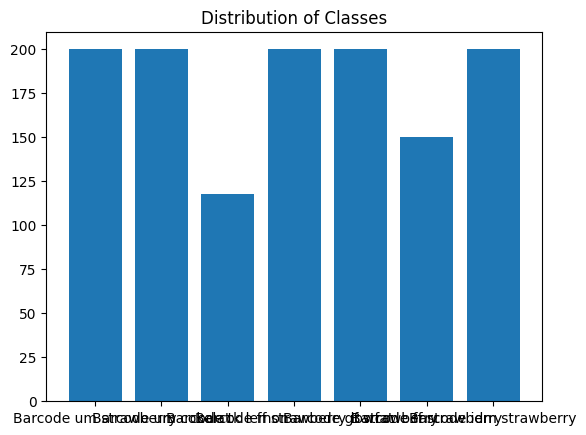

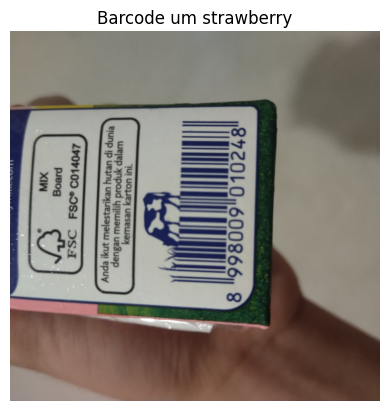

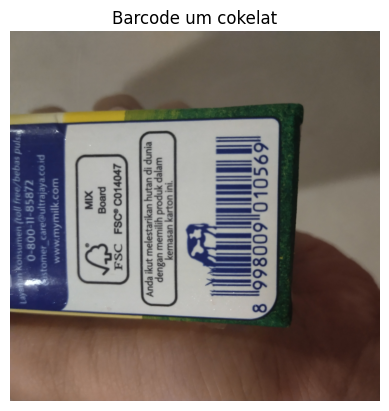

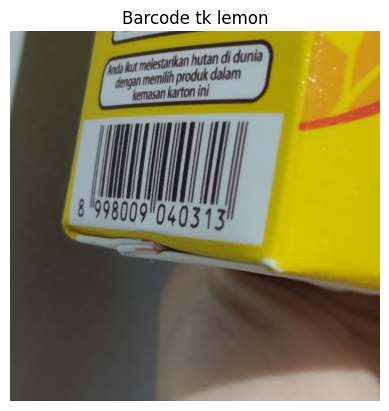

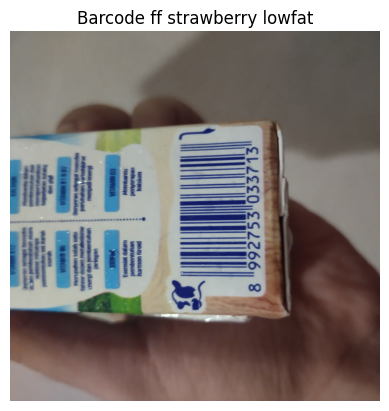

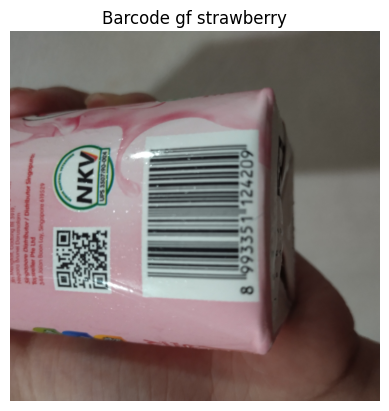

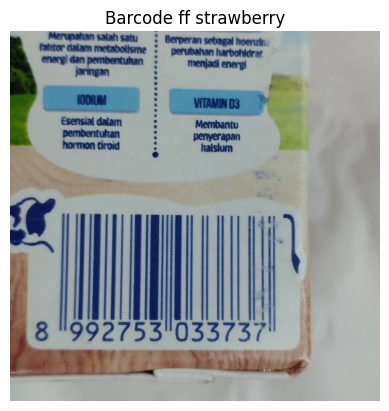

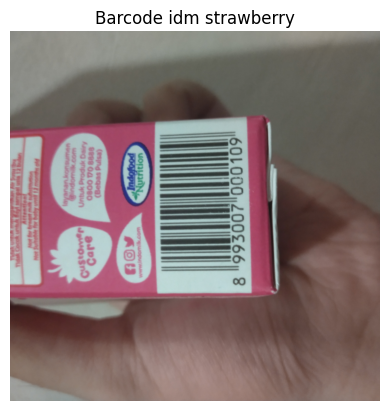

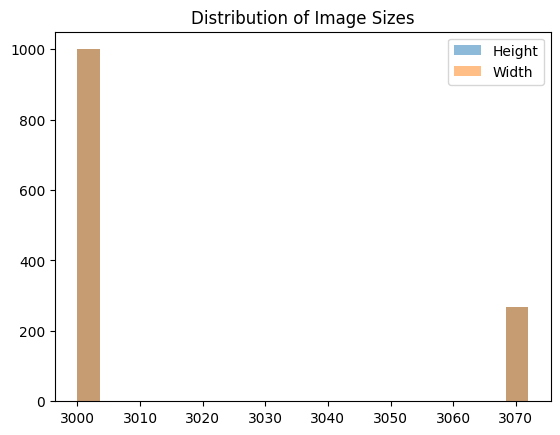

In [ ]:
# Distribution of Classes
base_dir = '/content/gambar'
folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder)) and not folder.startswith('.')]
class_counts = {folder: len(os.listdir(os.path.join(base_dir, folder))) for folder in folders}

plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribution of Classes')
plt.show()

# Sample Images
for folder in folders:
    sample_image = os.listdir(os.path.join(base_dir, folder))[0]
    img_path = os.path.join(base_dir, folder, sample_image)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    plt.show()

# Image Sizes
heights, widths = [], []
for folder in folders:
    for image_name in os.listdir(os.path.join(base_dir, folder)):
        img_path = os.path.join(base_dir, folder, image_name)
        img = plt.imread(img_path)
        heights.append(img.shape[0])
        widths.append(img.shape[1])

plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.legend(loc='upper right')
plt.title('Distribution of Image Sizes')
plt.show()

### Check Quantity

In [ ]:
class_counts = {folder: len(os.listdir(os.path.join(base_dir, folder))) for folder in folders}
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Barcode um strawberry: 200 images
Barcode um cokelat: 200 images
Barcode tk lemon: 118 images
Barcode ff strawberry lowfat: 200 images
Barcode gf strawberry: 200 images
Barcode ff strawberry: 150 images
Barcode idm strawberry: 200 images


### Total Images

In [ ]:
image_count = len(list(Path(base_dir).glob('*/*.jpg')))
print("Total number of images:", image_count)

Total number of images: 1268



## Directories Images

In [ ]:
train_dir = base_dir
validation_dir = base_dir

## Modelling

### Building the Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')  # Adjust the number of classes (there are 7)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# Cetak nama kelas dan indeks numerik dari train_generator
print("Mapping of class names to numeric indices:")
print(train_generator.class_indices)
print()

# Ambil satu batch dari train_generator
images, labels = train_generator.next()

# Cetak label pada batch pertama
print("Labels pada batch pertama:")
print(labels)
print()

# Anda dapat mengakses hanya kunci (nama kelas) dari kamus class_indices
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)
print()

# Contoh: Output yang diharapkan
# Mapping of class names to numeric indices:
# {'ff_strawberry': 0, 'ff_strawberry_lowfat': 1, 'gf_strawberry': 2, ... }

# Labels pada batch pertama:
# [[0. 0. 1. 0. 0. 0. 0.]
#  [1. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 1.]
#  [0. 0. 0. 0. 0. 1. 0.]
#  [0. 0. 0. 1. 0. 0. 0.]
#  [0. 1. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 0.]
#  [0. 0. 0. 0. 0. 1. 0.]
#  [0. 0. 0. 0. 0. 0. 1.]
#  [0. 0. 0. 1. 0. 0. 0.]
#  [0. 0. 0. 0. 1. 0. 0.]
#  [0. 0. 1. 0. 0. 0. 0.]
#  [0. 1. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 0. 1.]
#  [0. 0. 0. 1. 0. 0. 0.]
#  [0. 0. 0. 1. 0. 0. 0.]
#  [0. 0. 1. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 0.]
#  [0. 0. 0. 0. 1. 0. 0.]
#  [0. 0. 0. 0. 1. 0. 0.]
#  [0. 1. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 0. 1. 0. 0.]
#  [0. 0. 0. 0. 0. 1. 0.]
#  [0. 0. 0. 0. 0. 1. 0.]]

# Class names: ['ff_strawberry', 'ff_strawberry_lowfat', 'gf_strawberry', ... ]

Mapping of class names to numeric indices:
{'Barcode ff strawberry': 0, 'Barcode ff strawberry lowfat': 1, 'Barcode gf strawberry': 2, 'Barcode idm strawberry': 3, 'Barcode tk lemon': 4, 'Barcode um cokelat': 5, 'Barcode um strawberry': 6}

Labels pada batch pertama:
[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0

## Image Processing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1015 images belonging to 7 classes.
Found 253 images belonging to 7 classes.


In [ ]:
#verifikasi
for data, labels in train_generator:
    print("Shape of data:", data.shape)
    print("Shape of labels:", labels.shape)
    break

Shape of data: (32, 150, 150, 3)
Shape of labels: (32, 7)


### Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training Model

In [ ]:
# Count the number of images in the training and validation directories
train_samples = len(train_generator.filenames)
validation_samples = len(validation_generator.filenames)

# Determine the batch size
batch_size = 32

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = math.ceil(train_samples / batch_size)
validation_steps = math.ceil(validation_samples / batch_size)

print(f'Steps per epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Steps per epoch: 32
Validation steps: 8


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30
32/32 [==============================] - 166s 5s/step - loss: 2.2643 - accuracy: 0.1783 - val_loss: 1.7974 - val_accuracy: 0.2451
Epoch 2/30
32/32 [==============================] - 181s 6s/step - loss: 1.3314 - accuracy: 0.4729 - val_loss: 1.1595 - val_accuracy: 0.4822
Epoch 3/30
32/32 [==============================] - 162s 5s/step - loss: 0.6976 - accuracy: 0.7241 - val_loss: 0.5398 - val_accuracy: 0.7945
Epoch 4/30
32/32 [==============================] - 164s 5s/step - loss: 0.4917 - accuracy: 0.7980 - val_loss: 0.5834 - val_accuracy: 0.8221
Epoch 5/30
32/32 [==============================] - 182s 6s/step - loss: 0.4195 - accuracy: 0.8296 - val_loss: 0.3392 - val_accuracy: 0.8775
Epoch 6/30
32/32 [==============================] - 172s 5s/step - loss: 0.2595 - accuracy: 0.8975 - val_loss: 0.4105 - val_accuracy: 0.7945
Epoch 7/30
32/32 [==============================] - 162s 5s/step - loss: 0.2863 - accuracy: 0.8837 - val_loss: 0.2705 - val_accuracy: 0.8893
Epoch 8/30
32

## Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_steps)
print('Test accuracy:', test_acc)

8/8 [==============================] - 25s 3s/step - loss: 0.0720 - accuracy: 0.9684
Test accuracy: 0.9683794379234314


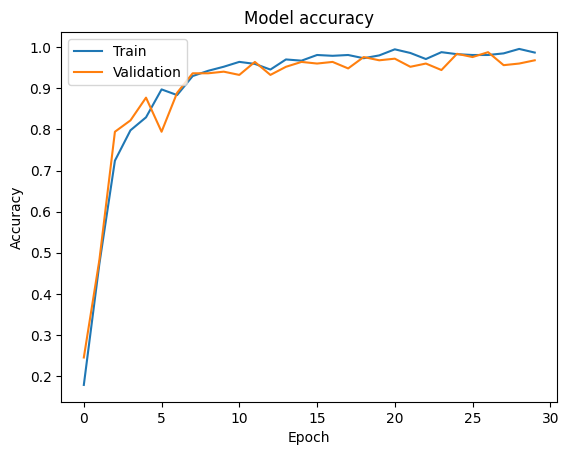

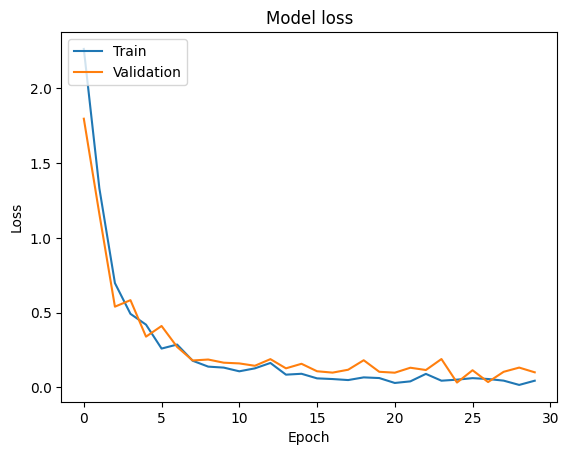

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Categorization of Sugar Levels and Recommendation Function

In [ ]:
# Dictionary berisi kadar gula dan volume asli untuk setiap produk (kadar gula dalam gram, isi bersih dalam ml)
sugar_content = {
    "Barcode ff strawberry": (22, 225),
    "Barcode ff strawberry lowfat": (21, 225),
    "Barcode gf strawberry": (23, 250),
    "Barcode idm strawberry": (18, 180),
    "Barcode um strawberry": (19, 250),
    "Barcode um cokelat": (19, 250),
    "Barcode tk lemon": (20, 250)
}

# Dictionary berisi barcode untuk setiap produk
barcodes = {
    "Barcode ff strawberry": 8992753033737,
    "Barcode ff strawberry lowfat": 8992753033713,
    "Barcode gf strawberry": 8993351124209,
    "Barcode idm strawberry": 8993007000109,
    "Barcode um strawberry": 8998009010248,
    "Barcode um cokelat": 8998009010569,
    "Barcode tk lemon": 8998009040313
}

# Fungsi untuk menghitung kadar gula per 100 ml
def get_sugar_per_100ml(sugar, volume):
    return (sugar / volume) * 100

# Fungsi untuk mengkategorikan produk berdasarkan kadar gula per 100 ml
def classify_sugar_grade(sugar_per_100ml):
    if sugar_per_100ml < 1:
        return 'A'
    elif sugar_per_100ml < 5:
        return 'B'
    elif sugar_per_100ml < 10:
        return 'C'
    else:
        return 'D'

# Dictionary berisi rekomendasi produk serupa dengan kadar gula lebih rendah
recommendations = {
    "Barcode ff strawberry": ["ff strawberry_lowfat", "gf_strawberry", "um_strawberry", "indomilk_strawberry"],
    "Barcode ff strawberry lowfat": ["gf_strawberry", "um_strawberry", "indomilk_strawberry"],
    "Barcode gf strawberry": ["um_strawberry", "indomilk_strawberry"],
    "Barcode idm strawberry": ["um_strawberry", "gf_strawberry"],
    "Barcode um strawberry": ["gf_strawberry", "indomilk_strawberry"],
    "Barcode um cokelat": [],
    "Barcode tk lemon": []
}

# Fungsi untuk merekomendasikan produk serupa dengan kadar gula lebih rendah
def recommend_lower_sugar_product(product):
    if product in recommendations:
        return recommendations[product]
    else:
        return []

## Prediction

In [ ]:
# Prediction function
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    predictions = model.predict(img_tensor)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = list(train_generator.class_indices.keys())[predicted_class_idx]

    # Debugging: Print the predicted class
    print(f"Predicted class: {predicted_class}")

    # Dapatkan kadar gula dan volume produk yang diprediksi
    sugar, volume = sugar_content.get(predicted_class, (0, 1))
    sugar_per_100ml = get_sugar_per_100ml(sugar, volume)
    grade = classify_sugar_grade(sugar_per_100ml)

    # Dapatkan barcode produk yang diprediksi
    barcode = barcodes.get(predicted_class, None)

    # Dapatkan rekomendasi produk dengan kadar gula lebih rendah
    recommended_products = recommend_lower_sugar_product(predicted_class)

    return predicted_class, grade, barcode, recommended_products

# Contoh prediksi menggunakan gambar dari dataset
sample_img_path = '/content/gambar/Barcode ff strawberry/IMG_20240530_165211.jpg'  # Ganti dengan path gambar yang sesuai
predicted_class, grade, barcode, recommended_products = predict_image(sample_img_path, model)

print(f"Predicted product: {predicted_class}")
print(f"Sugar content category: {grade}")
print(f"Product barcode: {barcode}")
print(f"Recommended products with lower sugar content: {recommended_products}")

1/1 [==============================] - 0s 176ms/step
Predicted class: Barcode ff strawberry
Predicted product: Barcode ff strawberry
Sugar content category: C
Product barcode: 8992753033737
Recommended products with lower sugar content: ['ff strawberry_lowfat', 'gf_strawberry', 'um_strawberry', 'indomilk_strawberry']


## Save Model

In [ ]:
# Save Model
model.save('barcode_scanner_and_recommender.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(os.getcwd())  # Menampilkan direktori kerja saat ini

# Mencari file .h5 di direktori kerja saat ini
print(os.listdir())

/content
['.config', 'ff_lowfat_image.zip', 'um_cokelat_image.zip', 'gf_image.zip', 'gambar', 'ff_image.zip', 'model_scanner_and_recommender.tflite', 'um_strawberry_image.zip', 'indomilk_image.zip', 'barcode_scanner_and_recommender.h5', 'tk_image.zip', '.ipynb_checkpoints', 'sample_data']


In [ ]:
# Install tensorflow
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Convert to tflite
# Load the saved model
model = tf.keras.models.load_model('barcode_scanner_and_recommender.h5')

# Convert the model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the tflite model
with open('model_scanner_and_recommender.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Cari file model.tflite di direktori /content
tflite_model_path = '/content/model_scanner_and_recommender.tflite'

if os.path.exists(tflite_model_path):
    print(f"File model.tflite ditemukan di: {tflite_model_path}")
else:
    print("File model.tflite tidak ditemukan.")

File model.tflite ditemukan di: /content/model_scanner_and_recommender.tflite
